### Design and develop the Logistic Regression algorithm from scratch using Python

For a binary classifier, we want the classifier to output values that are between 0 and 1. 
i.e. $$0\leq y_\theta(x)\leq1$$



The term logistic regression refers to "*logit function*" which refers to "*log odds*".
*Odds refers to the ratio of the probability of an event occuring to the probability it does not occur.*

Consider a model with feature $x_{1}$, $x_{2}$,...,$x_{n}$ and output denoted by $y$ that can take values 0 and 1. Let **p** be the probability of **Y=1**
$$
odd =\frac p{1-p}
$$
Taking the log, log odds for the model becomes
$$
log (\frac p{1-p}) = \theta_{0}x_{0} + \theta_{1}x_{1}+ ... + \theta_{n}x_{n}
$$
where $\theta_{1},\theta_{2} ... \theta_{n}$ are weights, $\theta_{0}x_{0} $ serves as intercept with $x_{0}$ = 1

Simplifying the equation to obtain **p**
$$
p =\frac 1{1+e^{-( \theta_{0} + \theta_{1}x_{1}+ ... + \theta_{n}x_{n})}}
$$ which turns out to be the equation of the *Sigmoid Function*
$$
S_{z} =\frac 1{1+e^{-(z)}}
$$

With $z = \theta_{0}x_{0} + \theta_{1}x_{1}+ \theta_{2}x_{2}+ ... + \theta_{n}x_{n}$,



In [1]:
def sigmoid(z):    
    return 1/ (1 + np.exp(-z))

### Cost function

Since the logistic regression function(sigmoid) is *non linear*, to get a *convex function*, i.e a bowl-shaped function that eases the gradient descent function's work to converge to the optimal minimum point,a logistic regression cost function is derived as shown below



$$h = \frac 1{1+e^{-(\theta^Tx)}} $$

 $$Cost(h,y)= \left( \begin{array}{c} -log(h)\;\;if\;y =1 \\-log(1-h)\;\;if\;y =0\end{array}\right) $$
 
 where $h$ is the prediction label while y is the actual label

*Log of numbers between 0 and 1 returns a negative value. The negative sign before the log counters that.*
 
 Making the equation more compact into a one-line expression, we have:
$$
 Cost(h,y)=-ylog(h)-((1-y)log(1-h)
$$
substituting y=1 or 0 respectively returns the previous equation

With *m* as the size of my training set and *i* as ith training example

The cost function $J(\theta)$ can be rewritten as:
$$J(\theta)= \frac1m\sum \limits _{i=1} ^{m}Cost(h,y)$$
$$J(\theta)= −\frac1m\sum \limits _{i=1} ^{m}y^{(i)}log(h^{(i)})+((1-y^{(i)})log(1-h^{(i)}))$$

In [2]:
def Cost_function(x,y,theta):
    m = len(y)
    y_pred = sigmoid(np.dot(x, theta))
    error =(y * np.log(y_pred)) + ((1-y)* np.log(1-y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost , gradient

### Gradient descent

To choose the values of $\theta$=$\theta_{0}$,$\theta_{1}$...$\theta_{n}$ that corresponds to a convex function and fits the data well(so we reach a global minimum), ensure that $h = \theta_{0} + \theta_{1}x_{1}...\theta_{n}x_{n}$is at least close to the actual $y$, minimize the cost function$J(\theta)$ using gradient descent.

Repeat until convergence, updating all $\theta_j$:$\left[ \theta_{0},\theta_{1},\theta_{2}\cdots,\theta_{n}\right] $$${\theta_j}:=\theta_j−\alpha\frac{\partial}{\partial \theta_j}J(\theta)
$$
where $\alpha$ = Learning rate

And partial deivative of cost function$J(\theta)$ with respect to $\theta$ :$$
\frac{\partial}{\partial \theta_j}J(\theta)=−\frac1m\sum \limits _{i=1} ^{m}(h^{(i)}+y^{(i)})x^{(i)}_j
$$

In [3]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = Cost_function(x,y,theta)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs
def predict(theta, x):
    results = x.dot(theta)
    return results > 0

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

Cost at initialization [0.69314718]
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]
Theta after running gradient descent: [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Resulting cost: [0.20489382]
Training Accuracy: 89 %
A person who scores 50 and 79 on their DMV written tests have a 0.71 probability of passing.


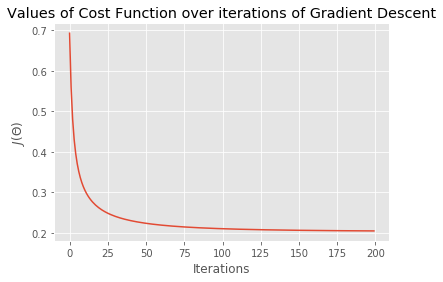

In [5]:
data = pd.read_csv("DMV_Written_Tests.csv")
scores = data[['DMV_Test_1', 'DMV_Test_2']].values
results = data['Results'].values
#standardization
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores

num_iter = 200
#include intercept
rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1) 
y = results.reshape(rows, 1)

#initialization
theta_init = np.zeros((cols + 1, 1))
cost, gradient = Cost_function(X, y,theta_init)

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

#Compute weights and cost function after running gradient descent
theta, costs = gradient_descent(X, y, theta_init, 1, 200)
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent")
p = predict(theta, X)
print("Training Accuracy:", sum(p==y)[0],"%")

#Test
test = np.array([50,79])
test = (test - mean_scores)/std_scores
test = np.append(np.ones(1), test)
probability = sigmoid(test.dot(theta))
print("A person who scores 50 and 79 on their DMV written tests have a",
      np.round(probability[0], 2),"probability of passing.")

### Plotting the decision boundary

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

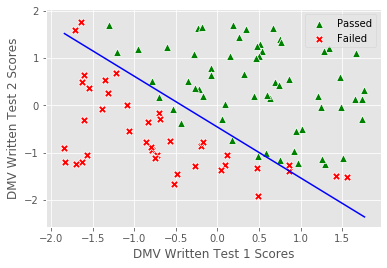

In [6]:
passed = (results == 1).reshape(100, 1)
failed = (results == 0).reshape(100, 1)
sns.scatterplot(x = X[passed[:, 0], 1],
                y = X[passed[:, 0], 2],
                marker = "^",
                color = "green",
                s = 60)
ax = sns.scatterplot(x = X[failed[:, 0], 1],
                    y = X[failed[:, 0], 2],
                    marker = "X",
                    color = "red",
                    s = 60)

ax.legend(["Passed", "Failed"])
ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

sns.lineplot(x = x_boundary, y = y_boundary, color="blue")
plt.show();